In [1]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import pandas as pd

import os
%matplotlib inline
import matplotlib.pyplot as plt
mda.__version__

'2.6.1'

In [3]:
#HERE YOU NEED TOPOLOGIES OF CRYSTAL STRUCTURES TO PLOT ON THE GRAPHS
u = mda.Universe('traj_center_fit.pdb', dt=10)
#uw = mda.Universe('lyso.pdb', dt=10)

len(u.trajectory)
#len(uw.trajectory)

FileNotFoundError: [Errno 2] No such file or directory: 'traj_center_fit.pdb'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_theme(style='ticks')
sbn.set_context("poster")

In [3]:
import pandas as pd

In [4]:
# Trajectory data
alpha_syn = pd.read_csv('alpha-syn_data.csv', index_col=0)
#lysozyme = pd.read_csv('lysozyme_data.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'alpha-syn_data.csv'

In [ ]:
# Per residue data

alpha_syn_rmsf = pd.read_csv('alpha_syn_rmsf.csv', names=[ 'RMSF'])
#lysozyme_rmsf = pd.read_csv('lysosyme_rmsf.csv', names=['RMSF'])

In [ ]:
# Plotting RMSD

f = plt.figure(figsize=(10, 10))

sbn.lineplot(
    data=alpha_syn,
    x= 'Time (ns)', y= 'RMSD', label ='Alpha-syn')
'''
sbn.lineplot(
    data = lysozyme,
  x= 'Time (ns)', y= 'RMSD',label='Lysozyme',color='darkred')
'''
# update axis lables here
plt.xlabel('time in [ns]')
plt.ylabel(r'RMSD in [$\AA$] ')
f.savefig('RMSD_asyn.jpg', dpi=300)

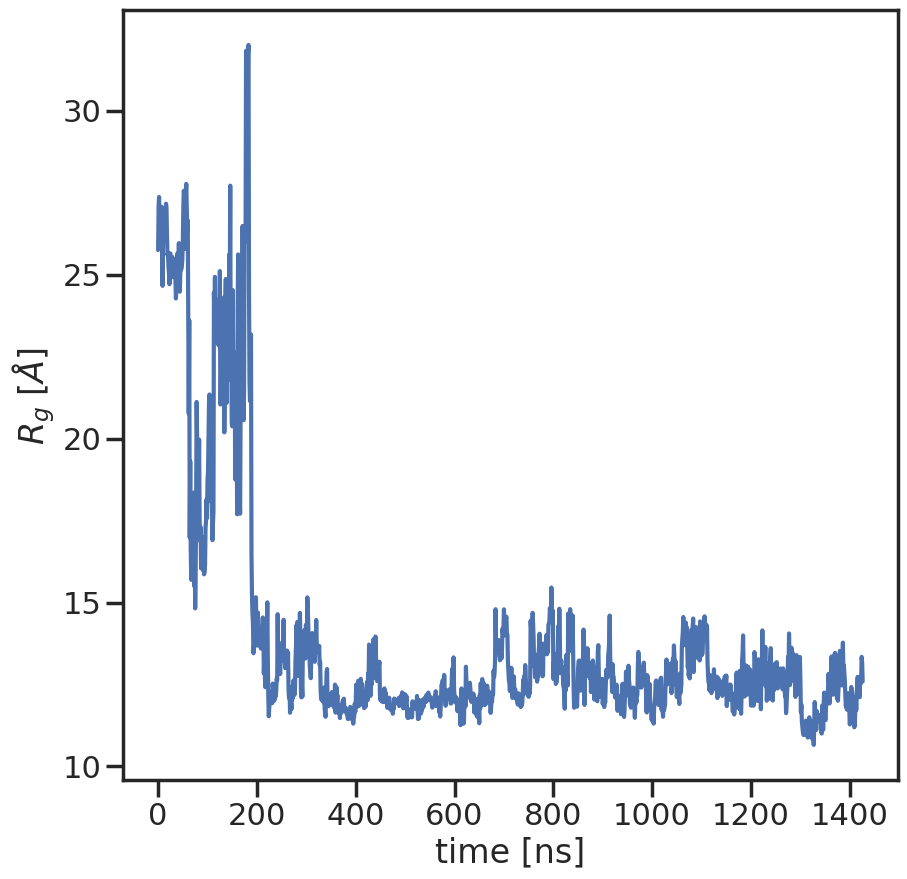

In [4]:
## Plotting Rg
alpha_syn = pd.read_csv('alpha-syn_Rg_data.csv', index_col=0)
f = plt.figure(figsize=(10, 10))

sbn.lineplot(
    data=alpha_syn,
    x= 'Time (ns)', y= 'Rg')
'''
sbn.lineplot(
    data = lysozyme,
  x= 'Time (ns)', y= 'Rg',label='Lysozyme',color='darkred')
'''
# update axis labels here
plt.xlabel('time [ns]')
plt.ylabel(r'$R_g$ [$\AA$] ')
f.savefig('Rg_asyn.jpg', dpi=300)

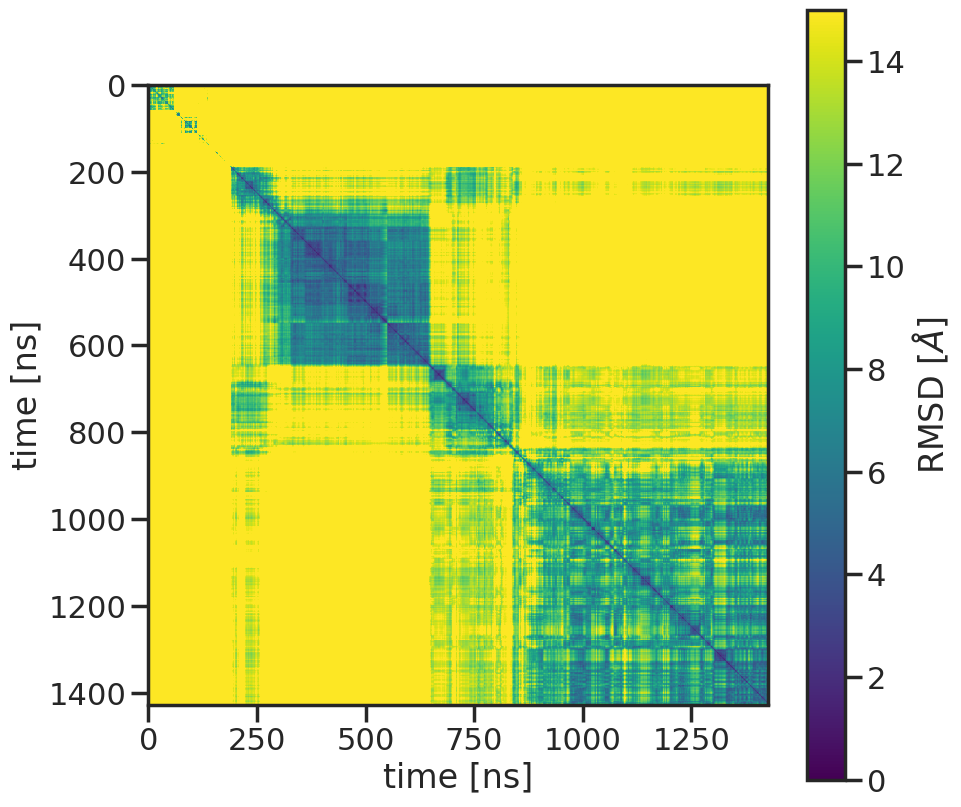

In [5]:
## Plotting pairwise RMSD
alpha_syn_pairRMSD = pd.read_csv('alpha-syn_pairRMSD_data.csv', index_col=0)
f = plt.figure(figsize=(10, 10))

'''
sbn.lineplot(
    data=alpha_syn,
    x= 'Time (ns)', y= 'Rg', label ='Alpha-syn')
sbn.lineplot(
    data = lysozyme,
  x= 'Time (ns)', y= 'Rg',label='Lysozyme',color='darkred')
'''
plt.imshow(alpha_syn_pairRMSD, cmap='viridis', vmin=0, vmax=15)
plt.xlabel('time [ns]')
plt.ylabel('time [ns]')
plt.colorbar(label=r'RMSD [$\AA$]')
f.savefig('pairRMSD_asyn.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# RMSF plots

f = plt.figure(figsize=(12, 6))

sbn.lineplot(
    data=alpha_syn_rmsf,
   x=alpha_syn_rmsf.index,y= 'RMSF', label ='Alpha-syn')
plt.xlabel('Residue number')
plt.ylabel(r'RMSF in [$\AA$] ')
'''
sbn.lineplot(
    data = lysozyme_rmsf,
 x=lysozyme_rmsf.index,y= 'RMSF',label='Lysozyme',color='darkred')
plt.xlabel('Residue number')
plt.ylabel(r'RMSF in [$\AA$] ')
'''
f.savefig('RMSF_asyn.jpg', dpi=300)

In [ ]:
import mdtraj as md
from __future__ import print_function
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import pandas as pd

import os
%matplotlib inline
import matplotlib.pyplot as plt
import mdtraj as md
#SASA CALCULATION
trajectory1 = md.load('mdAnalysis.pdb') #mdTraj is not able to automatically detect dt from the pdb file (it should be able to for xtc and trr files) and it defaults to 1ps
trajectory1.time=np.arange(trajectory1.n_frames)*10.0
sasa1 = md.shrake_rupley(trajectory1)
print(trajectory1)
print('sasa data shape', sasa1.shape)

trajectory2 = md.load('lyso.pdb') #mdTraj is not able to automatically detect dt from the pdb file (it should be able to for xtc and trr files) and it defaults to 1ps
trajectory2.time=np.arange(trajectory2.n_frames)*10.0
sasa2 = md.shrake_rupley(trajectory2)
print(trajectory2)
print('sasa data shape', sasa2.shape)

In [ ]:
total_sasa1 = sasa1.sum(axis=1)
print(total_sasa1.shape)

total_sasa2 = sasa2.sum(axis=1)
print(total_sasa2.shape)

In [ ]:
'''
from matplotlib.pylab import *

plot(trajectory1.time, total_sasa1)
xlabel('Time [ps]', size=16)
ylabel('Total SASA (nm)^2', size=16)
show()
'''

In [ ]:
f = plt.figure(figsize=(10, 10))